In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Final Project

## Build a Human Action Recognition Model

In [ ]:
# Libraries 
%autosave 5
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os


%matplotlib inline

Autosaving every 5 seconds


# Data Understanding

In [ ]:
# Loading the dataset

train = pd.read_csv('/content/drive/MyDrive/Technocolabs_Final_Project/kinetics700/kinetics-700_train.csv')


In [ ]:
train.head()

,label,youtube_id,time_start,time_end,split
0,abseiling,oJCxnjaCoyI,385,395,train
1,abseiling,XtbeP16BJdQ,787,797,train
2,abseiling,XXulvmGzw60,563,573,train
3,abseiling,-3B32lodo2M,59,69,train
4,abseiling,-7kbO0v4hag,107,117,train


In [ ]:
# Data Information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545317 entries, 0 to 545316
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   label       545317 non-null  object
 1   youtube_id  545317 non-null  object
 2   time_start  545317 non-null  int64 
 3   time_end    545317 non-null  int64 
 4   split       545317 non-null  object
dtypes: int64(2), object(3)
memory usage: 20.8+ MB


In [ ]:
# Data Decripton
train.describe(include='all')

,label,youtube_id,time_start,time_end,split
count,545317,545317,545317.000000,545317.000000,545317
unique,700,542802,NaN,NaN,1
top,inflating balloons,VRs-69kLs_4,NaN,NaN,train
freq,1000,3,NaN,NaN,545317
mean,NaN,NaN,86.498231,96.498075,NaN
std,NaN,NaN,199.786886,199.786955,NaN
min,NaN,NaN,0.000000,5.000000,NaN
25%,NaN,NaN,7.000000,17.000000,NaN
50%,NaN,NaN,30.000000,40.000000,NaN
75%,NaN,NaN,94.000000,104.000000,NaN


In [ ]:
# Checking the dimensions of the data
print('Rows : ',train.shape[0])
print('Columns : ',train.shape[1])

Rows :  545317
Columns :  5


In [ ]:
# Missing Values Check 
print(train.isnull().sum())

label         0
youtube_id    0
time_start    0
time_end      0
split         0
dtype: int64


In [ ]:
# Unique values 
train.nunique()

label            700
youtube_id    542802
time_start      2428
time_end        2433
split              1
dtype: int64

### Checking the test data set

In [ ]:
# Checking the test data set
test = pd.read_csv('/content/drive/MyDrive/Technocolabs_Final_Project/kinetics700/kinetics-700_test.csv')
test.head()

,youtube_id,time_start,time_end,split
0,6dEpI75FOeo,17,27,test
1,15H3EqaHVi0,8,18,test
2,d6Ko4hm8M8E,0,10,test
3,-SakeFNtM0s,57,67,test
4,at3mGS-FAVg,11,21,test


In [ ]:
# Sorted values of the test data
test.sort_values(by='youtube_id').head()

,youtube_id,time_start,time_end,split
36867,---v8pgm1eQ,0,10,test
69609,--0BJ-j7tg8,0,10,test
26642,--0kKuQu4Gs,0,10,test
32127,--1f2DTKcwg,111,121,test
18437,--2V_kDPfDg,192,202,test


### Taking the 50 categories from the original dataset

In [ ]:
# getting the first 50 categories 
categories = train['label'].value_counts().head(50).index

categories

Index(['inflating balloons', 'milking cow', 'deadlifting', 'vacuuming floor',
       'dribbling basketball', 'high jump', 'playing flute',
       'dancing macarena', 'slacklining', 'welding', 'kitesurfing',
       'cartwheeling', 'chopping wood', 'celebrating', 'archery',
       'snowmobiling', 'throwing ball (not baseball or American football)',
       'paragliding', 'playing keyboard', 'exercising with an exercise ball',
       'cheerleading', 'capoeira', 'breakdancing',
       'cooking sausages (not on barbeque)', 'finger snapping', 'side kick',
       'driving car', 'bouncing on trampoline', 'swinging on something',
       'brushing hair', 'roller skating', 'beatboxing', 'canoeing or kayaking',
       'feeding birds', 'pillow fight', 'headbanging', 'hammer throw',
       'watering plants', 'blowing out candles', 'stretching leg',
       'preparing salad', 'laughing', 'eating cake', 'opening present',
       'snowboarding', 'making pizza', 'waking up', 'ice climbing',
       'catchi

In [ ]:
# Function to take the significant amount of categories 
def top_dist_cat(data,category,loc):
    sample1 = data[data.loc[:,'label']==category].head(loc)
    sample1.reset_index(drop=True,inplace=True)
    return sample1

In [ ]:

# Making the sample data set with 50 categories with 10 videos
df = []
for i in categories:
    df.append(top_dist_cat(train,i,10))
new_train1 = pd.concat(df,ignore_index=True)

new_train1['label'].value_counts()

paragliding                                          10
catching or throwing baseball                        10
waking up                                            10
dancing macarena                                     10
laughing                                             10
preparing salad                                      10
eating cake                                          10
beatboxing                                           10
inflating balloons                                   10
feeding birds                                        10
opening present                                      10
swinging on something                                10
making pizza                                         10
kitesurfing                                          10
ice climbing                                         10
slacklining                                          10
chopping wood                                        10
cartwheeling                                    

In [ ]:
# Checking the number of the categories

print('Number of categories in the new data set : ',new_train1['label'].value_counts().index.size)

Number of categories in the new data set :  50


In [ ]:
# Checking the information about the new data set 
new_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       500 non-null    object
 1   youtube_id  500 non-null    object
 2   time_start  500 non-null    int64 
 3   time_end    500 non-null    int64 
 4   split       500 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.7+ KB


In [ ]:
new_train1.head()

,label,youtube_id,time_start,time_end,split
0,inflating balloons,adpDrnPWaKM,14,24,train
1,inflating balloons,ADqSnEzMMag,1,11,train
2,inflating balloons,AEN9SNm4FYM,34,44,train
3,inflating balloons,aF25RRu86FY,12,22,train
4,inflating balloons,AFvep7qqbJE,5,15,train


### Saving the new data set

In [ ]:
# Saving the sample data set to the disk 

new_train1.to_csv('/content/drive/MyDrive/Technocolabs_Final_Project/kinetics700/sample.csv',index=False)

In [ ]:
from sklearn.datasets import load_files

### Loading the video files from the directory

In [ ]:
# Loading the video files from the directory
import os
raw = load_files(os.getcwd()+'/drive/MyDrive/Technocolabs_Final_Project/vids',shuffle=False)

In [ ]:
from sklearn.model_selection import train_test_split

# Getting the file information located in directory

files = raw.filenames # getting the names of the files 

target = raw.target # labels for the video files

# Splitting the data set into train and test

train_files,test_files,train_targets,test_targets = train_test_split(files,target,test_size=(0.2),random_state=42)

print('Total Files are : ',len(files))

print('Total targets  are : ',len(target))

print('Train files size : ',train_files.shape[0])
print('Train targets size : ',train_targets.shape[0])
print('Test file(s) size : ',test_files.shape[0])
print('Test tragets size : ',test_targets.shape[0])

Total Files are :  96
Total targets  are :  96
Train files size :  76
Train targets size :  76
Test file(s) size :  20
Test tragets size :  20


In [ ]:
df = pd.DataFrame(columns=['labels','label_nums'])
labels=[]
nums=[]
for i in zip(raw.filenames,raw.target):
  labels.append(i[0].rsplit('/',2)[1])
  nums.append(i[1])

from sklearn.preprocessing import LabelEncoder

df['labels']=labels
df['label_nums'] = nums

df['labels'].value_counts()

shaking head           10
welding                10
push up                10
celebrating            10
golf driving           10
eating ice cream       10
riding scooter          9
breakdancing            9
raising eyebrows        9
clay pottery making     9
Name: labels, dtype: int64

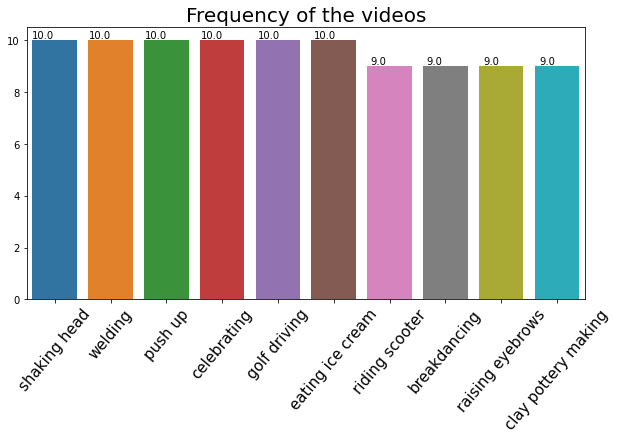

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
ax = sns.barplot(y=df['labels'].value_counts().values,x=df['labels'].value_counts().index)
for i in ax.patches:
  ax.annotate(str(i.get_height()),(i.get_x()*1.01,i.get_height()*1.01))
plt.xticks(rotation=50,fontsize=15)
plt.title('Frequency of the videos',fontsize=20)
plt.show()

### Classification of the labels

In [ ]:
# Categorical classification of the videos
for i in zip(range(0,len(raw.target_names)),raw.target_names):
    print(i)

(0, 'breakdancing')
(1, 'celebrating')
(2, 'clay pottery making')
(3, 'eating ice cream')
(4, 'golf driving')
(5, 'push up')
(6, 'raising eyebrows')
(7, 'riding scooter')
(8, 'shaking head')
(9, 'welding')


In [ ]:
# Checking the target
target # Here the numbers means the labels of the categories

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9])

In [ ]:
# Splitting the train data for making the validation set
valid_files = train_files[60:]
valid_targets = train_targets[60:]

train_files = train_files[:60]
train_targets =  train_targets[:60]

print('Train files size : ',train_files.shape[0])
print('Train targets size : ',train_targets.shape[0])

print('Validation file(s) size : ',valid_files.shape[0])
print('Validation tragets size : ',valid_targets.shape[0])

print('Test file(s) size : ',test_files.shape[0])
print('Test tragets size : ',test_targets.shape[0])

Train files size :  60
Train targets size :  60
Validation file(s) size :  16
Validation tragets size :  16
Test file(s) size :  20
Test tragets size :  20


In [ ]:
pip install sk-video

     |████████████████████████████████| 2.3MB 9.3MB/s 


In [ ]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm


class Videos(object):

    def __init__(self, target_size=None, to_gray=True, max_frames=None,
                 extract_frames='middle', required_fps=None,
                 normalize_pixels=None):
        """
        Initializing the config variables
        Parameters:
            target_size (tuple): (New_Width, New_Height), Default 'None'
                A tuple denoting the target width and height of each frame in each of the video
            to_gray (boolean): Default 'True'
                If True, then each frame will be converted to gray scale. Otherwise, not.
            max_frames (int): Default 'None'
                The maximum number of frames to return for each video.
                Extra frames are removed based on the value of 'extract_frames'.
            extract_frames (str): {'first', 'middle', 'last'}, Default 'middle'
                'first': Extract the first 'N' frames
                'last': Extract the last 'N' frames
                'middle': Extract 'N' frames from the middle
                    Remove ((total_frames - max_frames) // 2) frames from the beginning as well as the end
            required_fps (int): Default 'None'
                Capture 'N' frame(s) per second from the video.
                Only the first 'N' frame(s) for each second in the video are captured.
            normalize_pixels (tuple/str): Default 'None'
                If 'None', the pixels will not be normalized.
                If a tuple - (New_min, New_max) is passed, Min-max Normalization will be used.
                If the value is 'z-score', then Z-score Normalization will be used.
                For each pixel p, z_score = (p - mean) / std
        """

        self.target_size = target_size
        self.to_gray = to_gray
        self.max_frames = max_frames
        self.extract_frames = extract_frames
        self.required_fps = required_fps
        self.normalize_pixels = normalize_pixels
        self.fps = None

    def read_videos(self, paths):
        """
        Parameters:
            paths (list): Required
                 A list of paths of the videos to be read
        Returns:
            Numpy.ndarray
                A 5-d tensor with shape (<No. of Videos>, <No. of frames>, <height>, <width>, <channels>)
        """

        list_of_videos = [
            self._read_video(path) for path in tqdm(paths)
        ]

        tensor = np.vstack(list_of_videos)

        if self.normalize_pixels != None:
            # Pixels are normalized for each video individually
            if (type(self.normalize_pixels) == tuple) and (len(self.normalize_pixels) == 2):
                base = self.normalize_pixels[0]
                r = self.normalize_pixels[1] - base
                min_ = np.min(tensor, axis=(1, 2, 3), keepdims=True)
                max_ = np.max(tensor, axis=(1, 2, 3), keepdims=True)
                return ((tensor.astype('float32') - min_) / (max_ - min_)) * r + base

            elif self.normalize_pixels == 'z-score':
                mean = np.mean(tensor, axis=(1, 2, 3), keepdims=True)
                std = np.std(tensor, axis=(1, 2, 3), keepdims=True)
                return (tensor.astype('float32') - mean) / std
            
            else:
                raise ValueError('Invalid value of \'normalize_pixels\'')

        return tensor

    def get_frame_count(self, paths):
        """
        Can be used to determine the value of `max_frames`
        Parameters:
            paths (list): Required
                 A list of paths of the videos to be read
        Returns:
            dict (python dictionary)
                For each video, the total number of frames in that video is stored in the dictionary.
        """

        frame_count = {}
        for path in paths:
            cap = FFmpegReader(filename=path)
            frame_count[path] = cap.inputframenum
            cap.close()

        return frame_count

    def _read_video(self, path):
        """
        Parameters:
            path (str): Required
                Path of the video to be read
        Returns:
            Numpy.ndarray
                A 5-d tensor with shape (1, <No. of frames>, <height>, <width>, <channels>)
        """

        cap = FFmpegReader(filename=path)
        list_of_frames = []
        self.fps = int(cap.inputfps)                  # Frame Rate

        for index, frame in enumerate(cap.nextFrame()):

            capture_frame = True
            if self.required_fps != None:
                is_valid = range(self.required_fps)
                capture_frame = (index % self.fps) in is_valid

            if capture_frame:

                if self.target_size is not None:
                    temp_image = image.array_to_img(frame)
                    frame = image.img_to_array(
                        temp_image.resize(
                            self.target_size,
                            Image.ANTIALIAS)).astype('uint8')

                # Shape of each frame -> (<height>, <width>, 3)
                list_of_frames.append(frame)

        temp_video = np.stack(list_of_frames)
        cap.close()

        if self.to_gray:
            temp_video = rgb2gray(temp_video)
                
        if self.max_frames is not None:
            temp_video = self._process_video(video=temp_video)

        return np.expand_dims(temp_video, axis=0)

    def _process_video(self, video):
        """
        Parameters:
            video (Numpy.ndarray):
                Shape = (<No. of frames>, <height>, <width>, <channels>)
                Video whose frames are to be extracted
        Returns:
            Numpy.ndarray
                A tensor (processed video) with shape (<`max_frames`>, <height>, <width>, <channels>)
        """

        total_frames = video.shape[0]
        if self.max_frames <= total_frames:

            if self.extract_frames == 'first':
                video = video[:self.max_frames]
            elif self.extract_frames == 'last':
                video = video[(total_frames - self.max_frames):]
            elif self.extract_frames == 'middle':
                # No. of frames to remove from the front
                front = ((total_frames - self.max_frames) // 2) + 1
                video = video[front:(front + self.max_frames)]
            else:
                raise ValueError('Invalid value of \'extract_frames\'')

        else:
            raise IndexError(
                'Required number of frames is greater than the total number of frames in the video')

        return video

100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

Sample : 

Number of videos : 1
Frames for each video :  20
Dimensions of the frame  height x width:  (360, 480)
Colors in the image : 3


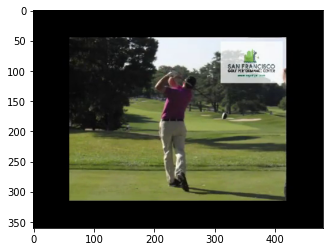

In [ ]:
# Making the sample and checking the video 
sample_files = train_files[:1]

reader = Videos(target_size=None,to_gray=False,max_frames=20)

sample = reader.read_videos(sample_files)

print("Sample : \n")
print('Number of videos :',sample.shape[0])
print('Frames for each video : ',sample.shape[1])
print('Dimensions of the frame  height x width: ',(sample.shape[2],sample.shape[3]))
print('Colors in the image :',sample.shape[-1])

plt.imshow(sample[0][3])
plt.show()

## Data Preprocessing

### Traininng Dataset


In [ ]:
# Training
reader = Videos(target_size=(128, 128), 
                to_gray=True, 
                max_frames=15, 
                extract_frames='middle', 
                required_fps=5, 
                normalize_pixels=(-1, 1))


# Converting the training data videos into tensors
x_train = reader.read_videos(train_files)
print()
print('Created tensors for the training successfully!!')

100%|██████████| 60/60 [00:41<00:00,  1.44it/s]


Created tensors for the training successfully!!


In [ ]:
print("Training Set : \n")
print('Number of videos :',x_train.shape[0])
print('Frames for each video : ',x_train.shape[1])
print('Dimensions of the frame  height x width: ',(x_train.shape[2],x_train.shape[3]))
print('Colors in the image :',x_train.shape[-1])

Training Set : 

Number of videos : 60
Frames for each video :  15
Dimensions of the frame  height x width:  (128, 128)
Colors in the image : 1


In [ ]:
from keras.utils import to_categorical

# Removing the videos which gave the errors on the frame conversion

y_train = to_categorical(train_targets)

In [ ]:
print(y_train[:3],train_targets[:3])

print('Shape of the Y-train :',y_train.shape)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] [4 7 1]
Shape of the Y-train : (60, 10)


### Validation set

In [ ]:
x_valid = reader.read_videos(valid_files)
print()
print('Created tensors for the validation successfully!!')

100%|██████████| 16/16 [00:13<00:00,  1.20it/s]


Created tensors for the validation successfully!!


In [ ]:
print("Validation Set : \n")
print('Number of videos :',x_valid.shape[0])
print('Frames for each video :',x_valid.shape[1])
print('Dimensions of the frame  height x width:',(x_valid.shape[2],x_valid.shape[3]))
print('Colors in the image :',x_valid.shape[-1])

Validation Set : 

Number of videos : 16
Frames for each video : 15
Dimensions of the frame  height x width: (128, 128)
Colors in the image : 1


In [ ]:
valid_files,valid_targets

(array(['/content/drive/MyDrive/Technocolabs_Final_Project/vids/eating ice cream/5gFmzOseaCY_105_10.mp4',
        '/content/drive/MyDrive/Technocolabs_Final_Project/vids/breakdancing/3VO5K6frvb0_97_10.mp4',
        '/content/drive/MyDrive/Technocolabs_Final_Project/vids/push up/LiRRgqFRdss_0_10.mp4',
        '/content/drive/MyDrive/Technocolabs_Final_Project/vids/clay pottery making/5cm0s1T7SRM_36_10.mp4',
        '/content/drive/MyDrive/Technocolabs_Final_Project/vids/breakdancing/IoFrHzxeCdg_20_10.mp4',
        '/content/drive/MyDrive/Technocolabs_Final_Project/vids/clay pottery making/LfrAP7Xddv8_191_10.mp4',
        '/content/drive/MyDrive/Technocolabs_Final_Project/vids/welding/CeujcvTqIPQ_34_10.mp4',
        '/content/drive/MyDrive/Technocolabs_Final_Project/vids/riding scooter/ma7Q3ormsZk_59_10.mp4',
        '/content/drive/MyDrive/Technocolabs_Final_Project/vids/welding/-9awf7U0UYE_145_10.mp4',
        '/content/drive/MyDrive/Technocolabs_Final_Project/vids/shaking head/a2hGThV

In [ ]:
y_valid = to_categorical(valid_targets)

y_valid,valid_targets

(array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32),
 array([3, 0, 5, 2, 0, 2, 9, 7, 9, 8, 2, 6, 7, 1, 9, 5]))

In [ ]:
y_valid.shape

(16, 10)

### Test data 

In [ ]:
x_test = reader.read_videos(np.delete(test_files,[1]))
print()
print('Created tensors for the testing successfully!!')

100%|██████████| 19/19 [00:14<00:00,  1.32it/s]


Created tensors for the testing successfully!!


In [ ]:
print("Test Set : \n")
print('Number of videos :',x_test.shape[0])
print('Frames for each video :',x_test.shape[1])
print('Dimensions of the frame  height x width:',(x_test.shape[2],x_test.shape[3]))
print('Colors in the image :',x_test.shape[-1])

Test Set : 

Number of videos : 19
Frames for each video : 15
Dimensions of the frame  height x width: (128, 128)
Colors in the image : 1


In [ ]:
y_test = to_categorical(np.delete(test_targets,[1]),num_classes=10)

print(y_test,np.delete(test_targets,[1]))

print('Shape of the y_test :',y_test.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]] [8 7 9 3 8 7 4 0 1 6 3 1 0 3 2 1 2 5 8]
Shape of the y_test : (19, 10)


### Constructing the models

# New Section

In [ ]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model

def Dmodel(output_unit,dense_unit_ini=32,dropout_unit=0.5):
  model = Sequential()

  # Adding Alternate convolutional and pooling layers
  model.add(Conv3D(filters=16, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu', 
                  input_shape=x_train.shape[1:]))
  model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

  model.add(Conv3D(filters=64, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
  model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

  model.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
  model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

  model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
  model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

  # A global average pooling layer to get a 1-d vector
  # The vector will have a depth (same as number of elements in the vector) of 1024
  model.add(GlobalAveragePooling3D())

  # Hidden layer
  model.add(Dense(dense_unit_ini, activation='relu'))

  # Dropout Layer
  model.add(Dropout(dropout_unit))

  # Output layer
  model.add(Dense(output_unit, activation='sigmoid'))

  print(model.summary())

  return model

In [ ]:
tf.random.set_seed(0)

model = Dmodel(output_unit=y_train.shape[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 15, 128, 128, 16)  736       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 8, 64, 64, 16)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 7, 62, 62, 64)     18496     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 4, 31, 31, 64)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 3, 29, 29, 256)    295168    
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 2, 15, 15, 256)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 1, 13, 13, 1024)   4

In [ ]:
from keras.callbacks import ModelCheckpoint

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],)

# Saving the model that performed the best on the validation set
checkpoint = ModelCheckpoint(filepath='Model_1.weights.best.hdf5', save_best_only=True, verbose=1)

# Training the model for 40 epochs
history = model.fit(x_train, y_train, batch_size=4, epochs=50, 
                    validation_data=(x_valid, y_valid), verbose=1, callbacks=[checkpoint])

Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 2.3106 - accuracy: 0.1333WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0034s vs `on_test_batch_end` time: 0.0085s). Check your callbacks.

Epoch 00001: val_loss improved from inf to 2.35857, saving model to Model_1.weights.best.hdf5
15/15 [==============================] - 1s 65ms/step - loss: 2.3106 - accuracy: 0.1333 - val_loss: 2.3586 - val_accuracy: 0.0000e+00
Epoch 2/50
15/15 [==============================] - ETA: 0s - loss: 2.2887 - accuracy: 0.1333
Epoch 00002: val_loss did not improve from 2.35857
15/15 [==============================] - 1s 47ms/step - loss: 2.2887 - accuracy: 0.1333 - val_loss: 2.4460 - val_accuracy: 0.0000e+00
Epoch 3/50
14/15 [===========================>..] - ETA: 0s - loss: 2.2814 - accuracy: 0.1786
Epoch 00003: val_loss improved from 2.35857 to 2.31523, saving model to Model_1.weights.best.hdf5
15/15 [===========================

In [ ]:
# Loading the model that performed the best on the validation set
model.load_weights('Model_1.weights.best.hdf5')

# Testing the model on the Test data
(loss, accuracy) = model.evaluate(x_train,y_train, batch_size=4, verbose=0)

print('Accuracy on train data: {:.2f}%'.format(accuracy * 100))

Accuracy on train data: 16.67%


In [ ]:
# Loading the model that performed the best on the validation set
model.load_weights('Model_1.weights.best.hdf5')

# Testing the model on the Test data
(loss, accuracy) = model.evaluate(x_test, y_test, batch_size=4, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy * 100))

Accuracy on test data: 5.26%


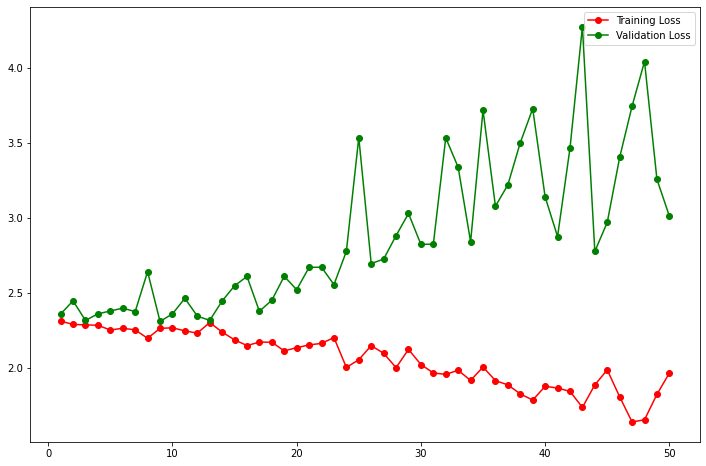

In [ ]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss = history.history['loss']                          # Loss on the training data
val_loss = history.history['val_loss']                  # Loss on the validation data
epochs = range(1,51)
# Plot for the training and validation losses
plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'go-', label = 'Validation Loss')
plt.legend()

In [ ]:
# Model 2
model1 = Dmodel(output_unit=y_train.shape[1],dense_unit_ini=10,dropout_unit=0.5)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_4 (Conv3D)            (None, 15, 128, 128, 16)  736       
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 8, 64, 64, 16)     0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 7, 62, 62, 64)     18496     
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 4, 31, 31, 64)     0         
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 3, 29, 29, 256)    295168    
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 2, 15, 15, 256)    0         
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 1, 13, 13, 1024)  

In [ ]:
from keras.callbacks import ModelCheckpoint

# Compiling the model
model1.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'],)

# Saving the model that performed the best on the validation set
checkpoint = ModelCheckpoint(filepath='Model_2.weights.best.hdf5', save_best_only=True, verbose=1)

# Training the model for 40 epochs
history = model1.fit(x_train, y_train, batch_size=4, epochs=50, 
                    validation_data=(x_valid, y_valid), verbose=1, callbacks=[checkpoint])

Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 0.7154 - accuracy: 0.0833WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0034s vs `on_test_batch_end` time: 0.0083s). Check your callbacks.

Epoch 00001: val_loss improved from inf to 0.58523, saving model to Model_2.weights.best.hdf5
15/15 [==============================] - 1s 68ms/step - loss: 0.7154 - accuracy: 0.0833 - val_loss: 0.5852 - val_accuracy: 0.0625
Epoch 2/50
14/15 [===========================>..] - ETA: 0s - loss: 0.6309 - accuracy: 0.0893
Epoch 00002: val_loss improved from 0.58523 to 0.56918, saving model to Model_2.weights.best.hdf5
15/15 [==============================] - 1s 60ms/step - loss: 0.6289 - accuracy: 0.0833 - val_loss: 0.5692 - val_accuracy: 0.1250
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 0.6117 - accuracy: 0.1167
Epoch 00003: val_loss did not improve from 0.56918
15/15 [==============================] - 1

In [ ]:
# Loading the model that performed the best on the validation set
model1.load_weights('Model_2.weights.best.hdf5')

# Testing the model on the Train data
(loss, accuracy) = model1.evaluate(x_train,y_train, batch_size=4, verbose=0)

print('Accuracy on train data: {:.2f}%'.format(accuracy * 100))

Accuracy on train data: 20.00%


In [ ]:
# Loading the model that performed the best on the validation set
model1.load_weights('Model_2.weights.best.hdf5')

# Testing the model on the Test data
(loss, accuracy) = model1.evaluate(x_test, y_test, batch_size=4, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy * 100))

Accuracy on test data: 10.53%


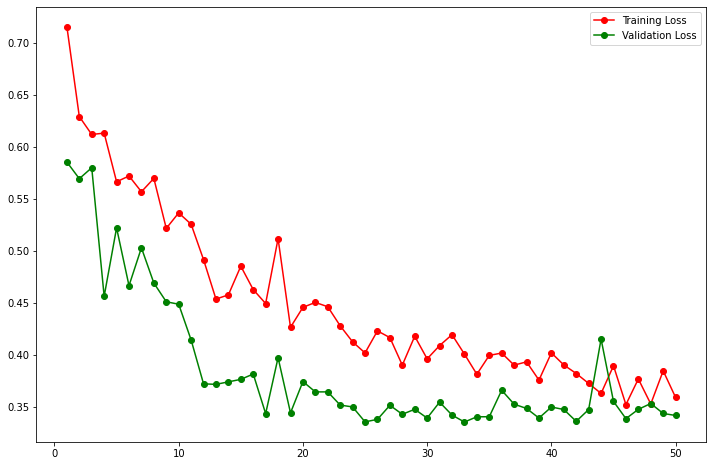

In [ ]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss = history.history['loss']                          # Loss on the training data
val_loss = history.history['val_loss']                  # Loss on the validation data
epochs = range(1,51)

plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'go-', label = 'Validation Loss')
plt.legend()

In [ ]:
model1.save('final_model.h5')

In [ ]:
test123 = load_files('/content/drive/MyDrive/Technocolabs_Final_Project/abc',shuffle=False)

In [ ]:
testf = test123.filenames

In [ ]:
a = reader.read_videos(testf)

100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


In [ ]:
model1.predict_classes(a)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([4, 4, 4, 4])

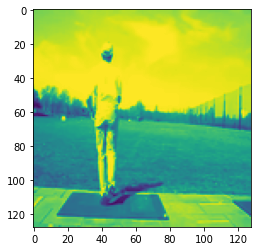

In [ ]:
plt.imshow(np.squeeze(a[0][2]))

In [ ]:
df.to_csv('dataframe.csv',index=False)